In [1]:
# Generate QR code
import qrcode

In [2]:
# Create image
def generate(data,img_name=None):
    img=qrcode.make(data)
    if img_name!=None:
        img.save("./img/{}".format(img_name))
    return img

In [3]:
# Generating simple number sequence
def r(x):
    return "".join([str(i) for i in range(x+1)])

In [4]:
r(50)

'01234567891011121314151617181920212223242526272829303132333435363738394041424344454647484950'

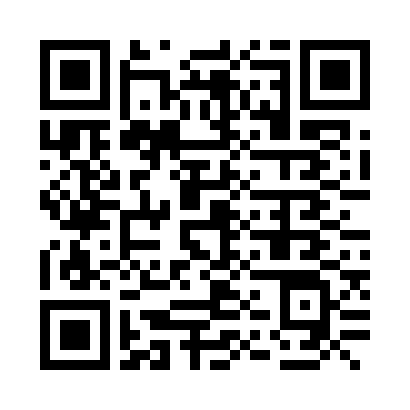

In [5]:
# QR code containing square of '#' of 10 by 5
generate(("#"*10+'\n')*5)

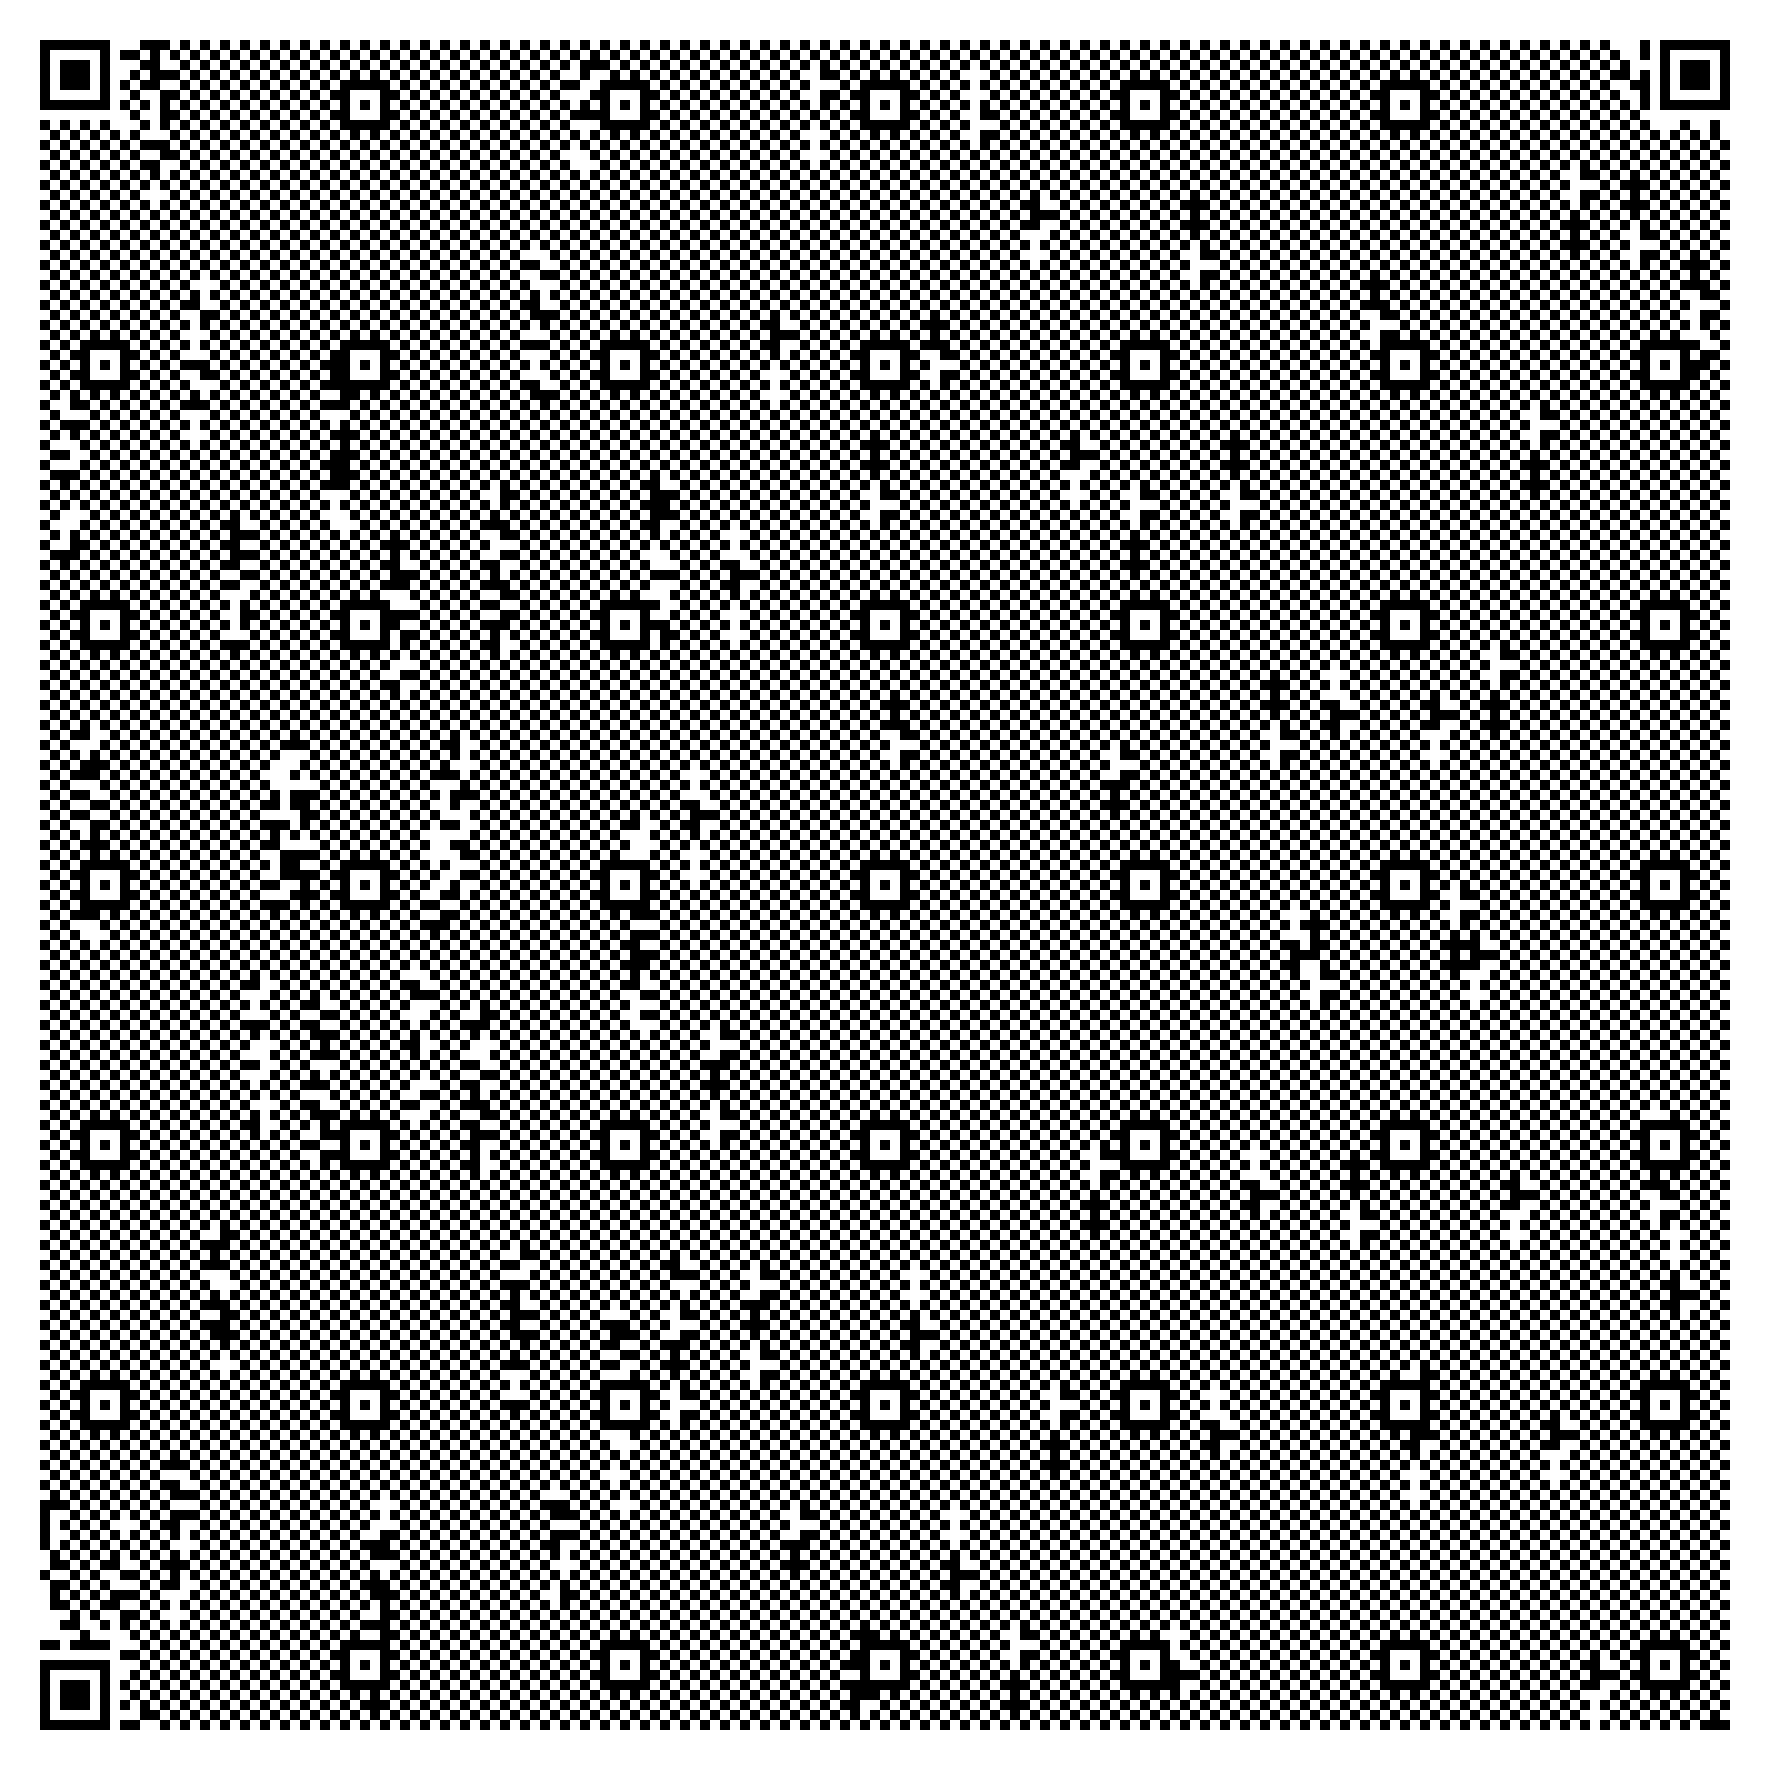

In [7]:
# Null data
generate("\x00"*2000)

In [8]:
# open("./img/r50","rb").read()

In [9]:
# Reading QR code from image
import cv2

In [10]:
# x -> image name
def output_data(x):
    detector = cv2.QRCodeDetector()
    img = cv2.imread(x)
    return detector.detectAndDecode(img)

In [11]:
# Data decoded from QR code                         | data
# Array of vertices of the found QR code quadrangle | bbox
# Rectified and binarized QR code                   | straight_qrcode

def read(x):
    data, bbox, straight_qrcode=output_data(x)
    if bbox is None:
        return False
    return data

In [12]:
generate(r(103),"r103")

len(read("./img/r103"))
# From observations, it seems to return empty string (data="") when:
# Data contained in QR code exceeds 202 bytes

202

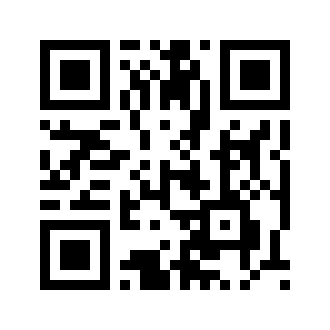

In [13]:
# Fuzzing/Fun with QR code outputs
# Produces 'fuzz1' with 'fuzz1' decoded data

generate("generate('fuzz1','fuzz1')","fuzz1")
generate(read("./img/fuzz1"),"fuzz1")

# Both 'fuzz1' have same content

In [14]:
# Producing QR code from QR code decoded data
# Result:
# - It produces 'fuzz2' from 'fuzz1' output
# - 'fuzz1' is the same as 'fuzz2'

generate("""generate("generate('fuzz1','fuzz1')",'fuzz2'),'fuzz1'""","fuzz2")
# read("./img/fuzz2")
eval(read("./img/fuzz2"))

(<qrcode.image.pil.PilImage at 0x7f612c0c3a30>, 'fuzz1')